# Part 1: Introduction To Cellular Automata

In the first part of this tutorial, we introduce the concept of a cellular automaton (CA), one of the first frameworks formulated to model complex systems, and explore how a seemingly simple schema can powerfully portray behavior in nonlinear dynamic systems. We then introduce our case study, Game of Life, which we will use throughout the extent of this tutorial to reinforce the concepts discussed.

## 1.1 What are CA?

Originally devised by mathematicians John von Neumann and Stanislaw Ulam in the 1940s, a cellular automaton consists of a regular *n x n* grid of cells, where each cell represents an individual *"automaton."* In computer science and mathematics, the term *automaton* refers to a machine that consists primarily of an internal state that changes as a function of its inputs.

CA are temporally and spatially discrete, which means that the simulation updates in a series of separate timesteps through interactions between distinct spatially distributed cells.

In order to further discuss the framework, we first need to build up a foundation of some of the concepts and definitions behind it.
#### 1.1.a States and Transitions

The core of any cellular automaton is the set of states that belongs to every cell. This finite, pre-defined set includes the states that a cell can take on over the course of a CA, and each state represents some real-world component of the problem that the model is trying to tackle.

States can be categorized as either *quiescent* or *non-quiescent*. A quiescent state remains in the same state if all of its neighbors are also in the same quiescent state - these are sometimes referred to as *vacuums*. Non-quiescent states are also known as *active* states, and these are what drive the behavior of the model.

In a CA, each cell/automaton is essentially a dynamic variable that changes its state over time. The *configuration*, or *generation*, of a CA is the state of every cell at a given point in time, and the model progresses over these configurations via transition rules that occur over discrete time steps. 

These transitions are defined by a *state transition function*, which performs an update on a cell's state based on its current state and the states of surrounding cells. This function is defined as:
<p style="text-align: center;">$s_{t+1}(x) = F(s_t(x_0), s_t(x_1), s_t(x_2),..., s_t(x_n))$</p>
where $s_t(x)$ returns the state of a given cell $x$ at a given time $t$. 

The set $N_x = \{x_0, x_1, x_2,...,x_n\}$ represents the neighborhood of $x$. The exact neighborhood depends on the specific problem, but it is some combination of cells directly adjacent to $x$. Two common paradigms are the von Neumann neighborhood, which consists of the upper, lower, left, and right cells, and the Moore neighborhood, which is the same as the von Neumann with the addition of the cells along the diagonals.

<img src="../res/sayama-neighborhoods.png">
<p style="text-align: center;"><em>Figure 1.1: A diagram demonstrating a von Neumann neighborhood (left) and a Moore neighborhood (right). Image from Sayama ch. 11, pg. 187</em></p>

An essential assumption of a CA is that the same state transition function, state set, and neighborhood rule are applied to all spatial locations. 

#### 1.1.b Boundaries

Since CA also have a spatial component, boundary conditions must be defined to explain behavior at the edges of the model. The four categories are:

1. **No Boundaries**: the space is infinite and filled with the quiescent state unless otherwise specified.
2. **Periodic Boundaries**: the space is finite, but the boundaries wrap around, creating a ring in a 1D case, or a torus in a 2D case.
3. **Cut-off Boundaries**: the space has fixed borders with no neighbors beyond those borders.
4. **Fixed Boundaries**: the cells at the edge of the space have a fixed state that will never change.

#### 1.1.c Classes of Cellular Automata

In the 1980s, computer scientist Stephen Wolfram published a book titled *A New Kind of Science* in which he presents and discusses various forms of simple computational models, including CA. Within this book, Wolfram defined four broad classes into which cellular automata can be divided. These definitions relate to the long-term behavior of a cellular automaton as it evolves over time:

1. **Class 1**: Almost all initial patterns evolve into a single uniform state. Behavior is simple.
2. **Class 2**: Initial patterns can evolve into many different stable or oscillating states. These states consist of a set of simple structures.
3. **Class 3**: Initial patterns evolve in a pseudorandom, seemingly chaotic matter. Some small-scale structures may still be seen.
4. **Class 4**: Involves a mixture of order and randomness. Simple local structures are produced (similarly to a Class 2), but these structures interact with each other in increasingly complex ways. This class is thought to be computationally universal.

<img src="../res/wolfram-classes.png">
<p style="text-align: center;"><em>Figure 1.2: An example of each type of class. The top of each image represents the initial conditions, and timesteps progress downward. Image taken from page 231 of Wolfram's A New Kind of Science.</em></p>

The interested reader is invited to explore this book further at https://www.wolframscience.com/nks/.

At this point, we have completed a high level overview of CA, and we now have a toolbox of basic concepts and definitions to be able to move forward into our case study. However, the set of concepts and rules defined above are not exhaustive. As it is with any form of modeling, the specifics rely heavily on the description and configuration of the problem itself. 

## 1.2 A Case Study: Game of Life

Proposed by British mathematician John Conway in 1970, Game of Life is one of the most well-known examples of a cellular automaton, and it will serve as our case study for further exploration of this framework. It is a good introduction to CA because not only is it simple and easily understandable, but it is also easily expandable, and the model achieves complex nontrivial behavior despite its simplicity. 

Considering 1.1.b and 1.1.c, Game of Life is a Class 4 CA that employs cut-off boundaries.

#### 1.2.a Implementation

In this section, we walk through a basic Python implementation of Game of Life that will serve as a foundation for the rest of this tutorial.

First, let's import our libraries. We utilize NumPy for its powerful array capabilities, Matplotlib for creating colormap plots, the random library for random number generation, and itertools.product for generating Cartesian products.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
from itertools import product

To begin, we first define our state set. Every cell consists of one of two self-explanatory states:
1. Alive
2. Dead
    
Per our definitions in 1.1.a, a Dead cell is a quiescent cell, and an Alive cell is an active cell. Let's associate these states with the integers 1 and 0. Although we could use booleans, using integers opens the door to possibly including more states when we expand the model in later tutorials.

In [37]:
# States:
ALIVE = 1
DEAD = 0

With our states defined, we now need a way of generating an initial configuration of the world.

To start, the $n$ x $n$ world, represented by a NumPy 2D array, is full of dead cells. We generate living cells in the form of clusters that are randomly placed and randomly populated. *cluster_n* and *clusters* determine the size and number of clusters, respectively, while threshold represents the likelihood that a given cell in a cluster is populated during the random generation phase. A threshold of 0 results in only dead cells, and a threshold of 1 results in only living cells.

In [38]:
def init_world(n = 16, cluster_n = 4, clusters = 3, threshold = 0.25):
    world = np.zeros((n, n), dtype=int)

    for i in range(0, clusters):
        x = random.randint(0, n - cluster_n)
        y = random.randint(0, n - cluster_n)
        for world_x in range(x, x + cluster_n):
            for world_y in range(y, y + cluster_n):
                if random.uniform(0, 1) >= (1 - threshold):
                    world[world_x, world_y] = ALIVE

    return world

Now that we have a world created, we need a way to intuitively represent it. To draw our world, we utilize Matplotlib's pseudocolor plot, which represents a 2D array as a rectangular grid of cells of varying colors. Red cells are living, and white cells are dead.

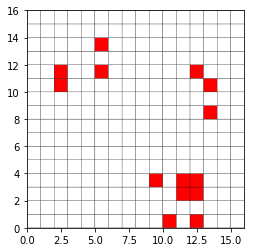

In [40]:
def plot_world(world):
    cmap = colors.ListedColormap(['white', 'red'])
    plt.pcolor(world, cmap=cmap, edgecolor="black")
    plt.axis('square')
    plt.show()
    
world1 = init_world() # initialize world with default conditions
plot_world(world1)

Transitions between generations follow the Moore neighborhood paradigm and are as follows:
1. Any living cell with fewer than 2 neighbors dies **(underpopulation)**
2. Any living cell with 2 or 3 neighbors lives on to the next generation
3. Any living cell with more than 3 neighbors dies **(overpopulation)**
4. Any dead cell with exactly 3 neighbors becomes a living cell **(reproduction)**

With these rules in mind, we can define a function that will take in the x and y coordinates of a cell, get its neighbors, and perform an update based on the number of living cells surrounding it. This update will be reflected in our world state variable.

As mentioned previously, our implementation of Game of Life assumes cut-off boundaries, therefore our state transition function must take this fact into account.

In [5]:
def update_cell(world, x, y):
    num_alive = 0
    current_state = world[x,y]

    #count neighbors accounting for boundaries
    x_range = range(max(x - 1, 0), min(x + 1, world.shape[0] - 1) + 1)
    y_range = range(max(y - 1, 0), min(y + 1, world.shape[1] - 1) + 1)

    #count the number of living cells in the von Neumann neighborhood of coordinates around our cell
    for cell_x, cell_y in product(x_range, y_range):
        if (not (cell_x, cell_y) == (x, y) and world[cell_x, cell_y] == ALIVE):
            num_alive += 1

    if (current_state == DEAD and not num_alive == 3):
        return DEAD
    elif (current_state == ALIVE and (num_alive < 2 or num_alive > 3)):
        return DEAD
    else:
        return ALIVE

We now have a function that applies an update to an individual cell (represented by an (x,y) coordinate). However, in order to move the current configuration of the world to the next, we need a function that performs an update on each cell of the board.

In [7]:
def timestep(world):
    rows = world.shape[0]
    cols = world.shape[1]

    new_state = np.zeros((rows, cols), dtype=int)
    for x in range(0, rows):
        for y in range(0, cols):
            new_state[x,y] = update_cell(world, x, y)

    return new_state

It is important to note that this update is **synchronous**, which means that the entire world is updated simultaneously. If a cell's state changes, that change is not accounted for until the next timestep, and to accomplish this we create a separate world state and apply the changes to that as we iterate through the grid. Depending on the problem, it may be necessary to perform **asynchronous** updates, where a single cell update is immediately taken into account for subsequent updates. We explore this concept in Part 2.

Another important remark is that this current algorithm is inefficient, as it iterates over every cell on the board for an $O(n^2)$ algorithm. This is acceptable for the sake of this tutorial, but for larger scales this could become computationally intractable. A possible angle for optimization would be to recognize that the majority of cells on the board will not change on an update, and that we need only target small areas of activity.

Let's view an example of a timestep. First, let's generate a small enough world so that we can easily view all transitions in a timestep

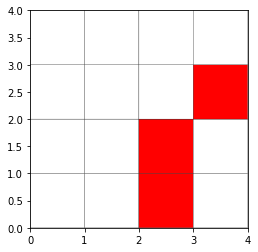

In [27]:
world2 = init_world(n = 4, cluster_n = 3, clusters = 2)
plot_world(world2)

Before running the next block of code, take a second and try to predict what the resultant world will look like based on the description of the rules above. Remember to take into account synchronous updates.

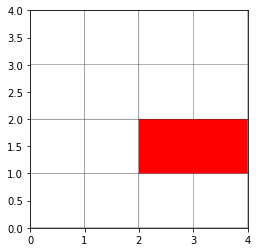

In [39]:
world2_next = timestep(world2)
plot_world(world2_next)

#### 1.2.b Rudimentary Analysis

For the last step of our introduction to Game of Life, we briefly explore a form of analysis for a CA. The idea behind it is simple: if we count the number of living cells in every timestep of a series of configurations, we can plot the density over time.

First, let's create a new world. Let's up the threshold a bit so we start off with a higher density.

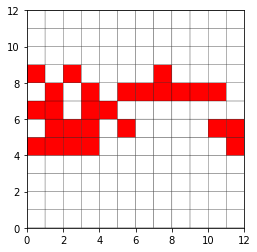

In [66]:
world3 = init_world(n = 12, cluster_n = 4, clusters = 4, threshold = 0.4)
plot_world(world3)

Using our previous timestep function, we can write a function to generate a timeseries of configurations.

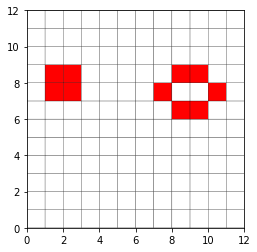

In [70]:
def timeseries(world, num_steps):
    simulation_steps = [world]
    for i in range(0, num_steps - 1):
        world = timestep(world)
        simulation_steps.append(world)

    return simulation_steps

configurations = timeseries(world3, 30)
plot_world(configurations[len(configurations) - 1])

Here we can see the end result of a timeseries of 30 steps. Now that we have our timeseries, we can plot the density of living cells over time.

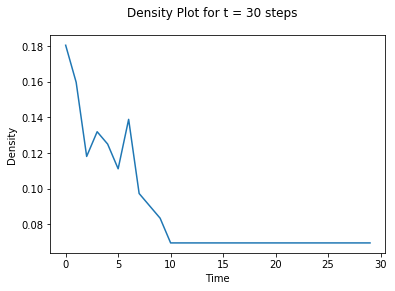

In [71]:
# define function to count all living entities given a configuration
def count_alive(world):
    return len(np.where((world == ALIVE).astype(int))[0])

def plot_density(timeseries):
    densities = []
    n = len(timeseries[0])
    for i in range(0, len(timeseries)):
        densities.append(count_alive(timeseries[i]) / (n * n))

    plt.plot(densities)
    plt.xlabel("Time")
    plt.ylabel("Density")
    plt.suptitle("Density Plot for t = " + str(len(timeseries)) + " steps")
    plt.show()
    
plot_density(configurations)

If you are running this notebook from the beginning, the plot you see may depend on how your specific world was created. However, in the long term, density typically drops to either 0, oscillates, or sits unchanging at some fixed constant. In Part 4, we explore a few of the emergent behaviors that give rise to these trends.

A density plot is an effective way of gaining a rudimentary overview of how a CA evolves over time ("at a glance"), but it doesn't provide much insight into the dynamics that may be occurring below the surface, especially in the case of Game of Life. In Part 3, we explore more insightful forms of analysis, including phase space visualization and mean field approximation.